In [24]:
import MDAnalysis as mda
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from Geometry import PointCloud, TransformationMatrix
import numpy
from colorsys import hsv_to_rgb
% matplotlib notebook

In [42]:
class Plot3D(object):
    def __init__(self):
        self.pointclouds = []
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        hues = numpy.linspace(0,0.8,self.pointclouds[0].points.shape[0])
        for pointcloud in self.pointclouds:
            cols = [hsv_to_rgb(h,1,1) for h in hues]
            ax.scatter(
                pointcloud.points[:,0], 
                pointcloud.points[:,1], 
                pointcloud.points[:,2], 
                 lw = 0.1,
                alpha=0.7,
                c=cols,
                s=50
            )

class Residue(object):
    def __init__(self, restype, atoms):
        self.restype = restype
        self.atoms = atoms
        self.pointcloud = PointCloud(3)
        self.pointcloud.add_points(atoms.coordinates())
        
class GromacsITPFile(object):
    def __init__(self, filename):
        self.filename = filename
    def read(self):
        tables = {}
        with open(self.filename, "r") as file_handle:
            active_table = None
            for line in file_handle:
                stripline = line.strip()
                if len(stripline) > 0:
                    if stripline[0] == "[" and stripline[-1] == "]":
                        active_table = stripline[1:-1]
                        if active_table not in tables:
                            tables[active_table] = {"columns":[], "rows":[]}
                    elif stripline[0] == ";" and active_table is not None:
                        tables[active_table]["columns"] = stripline[1:].split()
                    elif active_table is not None:
                        tables[active_table]["rows"].append({x: y for x, y in zip(tables[active_table]["columns"], stripline.split())})
                else:
                    active_table = None
            return tables
            

class ResidueType(object):
    def __init__(self, resname, mode="martini"):
        self.resname = resname
        self.examples = []
        self.mode = mode
    def load_itp(self, itp_file):
        f = GromacsITPFile(itp_file)
        tables = f.read()
        atoms = tables["atoms"]
        bonds = tables["bonds"]
        angles = tables["angles"]
        for atom in atoms["rows"]:
            if atom["residu"] == self.resname:
                self.atoms.
    def examples_from_file(self, filename):
        self.universe = mda.Universe(filename)
        residues = self.universe.select_atoms("resname " + self.resname).residues
        for res_atoms in residues:
            self.examples.append(Residue(self, res_atoms))
    def plot_example(self, example_id=0):
        example = self.examples[example_id]
        example.pointcloud.plot()
    def multi_align(self):
        reference = self.examples[0]
        a = Plot3D()
        for example in self.examples[1:]:
            _,_,s = example.pointcloud.paired_3d_align(reference.pointcloud)
            a.pointclouds.append(s)
        a.plot()
        
        
        
a = ResidueType("DLPG")
a.load_itp("data/DLPG.itp")

{'resnr': '1', 'residu': 'DLPG', 'charge': '0.0', 'atom': 'GL0', 'cgnr': '1', 'type': 'P4', 'id': '1'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '-1.0', 'atom': 'PO4', 'cgnr': '2', 'type': 'Qa', 'id': '2'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '0', 'atom': 'GL1', 'cgnr': '3', 'type': 'Na', 'id': '3'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '0', 'atom': 'GL2', 'cgnr': '4', 'type': 'Na', 'id': '4'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '0', 'atom': 'C1A', 'cgnr': '5', 'type': 'C1', 'id': '5'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '0', 'atom': 'C2A', 'cgnr': '6', 'type': 'C1', 'id': '6'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '0', 'atom': 'C3A', 'cgnr': '7', 'type': 'C1', 'id': '7'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '0', 'atom': 'C1B', 'cgnr': '8', 'type': 'C1', 'id': '8'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '0', 'atom': 'C2B', 'cgnr': '9', 'type': 'C1', 'id': '9'}
{'resnr': '1', 'residu': 'DLPG', 'charge': '0', 'atom': 'C3B', 'cgnr': '10', 'type': '

In [22]:
ref_points = PointCloud(3)
ref_points.randomsetup(lines=0, points=300)

<IPython.core.display.Javascript object>


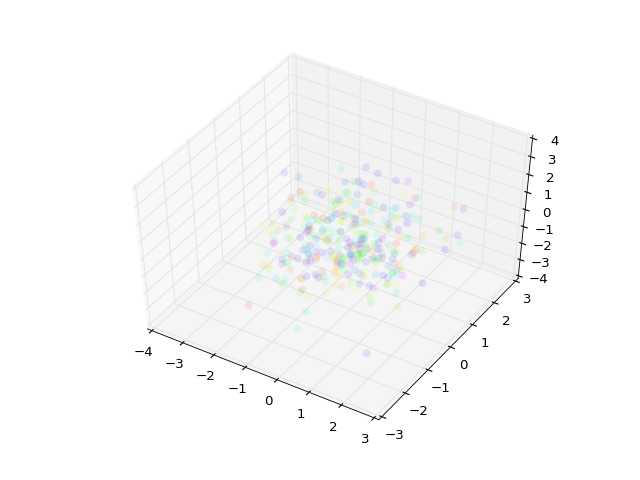

/media/shil3498/e84a79e0-0c3f-4939-ae95-d9afb822ad09/apps/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [24]:
ref_points.plot()